In [5]:
# 파일 읽어오는 함수
def readFile(path):
    with open(path, encoding='utf-8') as f:
        doc = []
        for line in f.read().splitlines()[1:]:
            try:
                doc.append(line.split(']')[2])
            except:
                pass
    return doc

In [6]:
txt = readFile('kakaotalk.txt')

In [7]:
txt

[' 사진',
 '  안에 꽉차서 기다리고잇어요',
 ' 줄 서은중',
 ' 사진 3장',
 ' 이렇게 나와요! 밥은 비벼먹는거여ㅆ어요',
 ' 찌게 인에 계란이 있는데 그거 잘 건져내서 같이 비벼먹을 수 있대요',
 ' 사진 2장',
 ' 계란 덜익은거 ',
 ' 너무 좋은거같아요 계란 넣을때 국물도 조금 들어가서 더 잘 비벼져! 너무 좋은 방법!!',
 ' 사진',
 ' 이제 저거 타고 갈꺼에요 ',
 ' 빠빠이 오빠~~',
 ' 이모티콘',
 ' 오오',
 ' 은영이 먹엇ㅅ구나',
 ' 맛있게 먹었어요?',
 ' 이제 우리 은영이 간다 ㅠㅠ',
 ' 사진 올리고 바로먹기 시작햇는데',
 ' 이십분도 안되고 먹엇넼ㅋㅋ',
 ' 조심히 가야해요!',
 ' 기다리는사람들이 많아서 ㅋㅋㅋㅋ 압박감잌ㅋㅋ 혼자먹으니까 더 천천히 못먹구',
 ' 음식이 깔끔하게 나오는거같아요!',
 ' 맛은 은영이 입맛에 괜찮았어요?',
 ' 응응 깔끔하고 반찬도 너무 맛잇더라구요',
 ' 찌게도 너무너무 맛잇엇어요!!',
 ' 다행이다 ㅎㅎㅎ',
 ' 우렁된장찌게를 거의 다른사람들도 시키더라구요',
 ' 너무 맛잇엇어요 오빠도 먹어봐야하는데,,! 줄을 서니까 시간이 부족하겟지 ㅠㅠ',
 ' 다른 메뉴 있어도 다들 그거 시키는구나',
 ' 맞아요 나중에 언젠가 먹을거에요 ㅠㅠ',
 ' 주날에',
 ' 공부하러가면',
 ' 그때 먹어봐도 좋겟어요',
 ' 오 그러네',
 ' 시험 끝나고 주말에 공부하러 갈때 그렇게 해봐야겠어요 ㅎㅎ',
 ' 은영이 도착했으려나',
 ' 응응! 아떻게 잘알지!',
 ' 엔젤리너스에서 아메리카노 사서 먹고있어요',
 ' 그 지하철 엔젤에서 사서 공항 들고와서 의자에 앉아서 먹는즁 ㅎㅎ',
 ' 오오 20퍼 할인 좋다 ㅎㅎㅎ',
 ' 은영이 좀 오래 기다려야하겠어요 ㅠㅠ',
 ' 생각보다 너무 일찍 도착해버린건가',
 ' ㅎㅎㅎ 이제 두신대요 뭐 ㅎㅎ',
 ' 은영이 핸드폰 배터리는 많이 있어요?',
 ' 55퍼있네',
 ' 으음 ',
 ' 충전하면서 해야

In [8]:
len(txt)

5033

In [28]:
# 전처리 함수
def preprocessing(txt):
    import re
    txt = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', txt)
    sw = set()
    with open('stopwords-ko.txt', encoding='utf-8') as f:
        for word in f:
            sw.add(word.replace('\n', ''))
            sw.add('어요')
            sw.add('아요')
            sw.add('는데')
            sw.add('에요')
            sw.add('인데')
    tokens = []
    from eunjeon import Mecab
    mecab = Mecab()
    for t in mecab.morphs(txt):
        if t not in sw and len(t) > 1:
            tokens.append(t)    
    return tokens

In [29]:
# nsmc 텍스트 전처리 함수 
def make(data):
    result = []
    for line in data:
        v = preprocessing(line)
        if v:
            result.append(v)
    return result

In [30]:
a = make(txt)

In [31]:
a

[['사진'],
 ['기다리'],
 ['서은'],
 ['사진'],
 ['이렇게', '나와요', '비벼', 'ㅆ어요'],
 ['찌게', '계란', '그거', '건져', '비벼', '대요'],
 ['사진'],
 ['계란'],
 ['너무', '계란', '국물', '들어가', '비벼져', '너무', '방법'],
 ['사진'],
 ['이제', '저거'],
 ['빠빠', '오빠'],
 ['이모티콘'],
 ['오오'],
 ['은영', '구나'],
 ['맛있'],
 ['이제', '은영', '간다', 'ㅠㅠ'],
 ['사진', '올리', '시작'],
 ['넼ㅋㅋ'],
 ['조심히'],
 ['기다리', '사람', '아서', 'ㅋㅋ', 'ㅋㅋ', '압박감', '잌ㅋㅋ', '으니까', '천천히'],
 ['음식', '깔끔', '나오'],
 ['은영', '입맛', '괜찮'],
 ['응응', '깔끔', '반찬', '너무', '더라구요'],
 ['찌게', '너무너무'],
 ['다행', 'ㅎㅎㅎ'],
 ['우렁', '장찌', '사람', '시키', '더라구요'],
 ['너무', '오빠', '봐야', '니까', '부족', 'ㅠㅠ'],
 ['메뉴', '어도', '그거', '시키', '는구나'],
 ['나중', 'ㅠㅠ'],
 ['공부'],
 ['봐도'],
 ['그러'],
 ['시험', '주말', '공부', '그렇게', '봐야겠어요', 'ㅎㅎ'],
 ['은영', '도착', '으려나'],
 ['떻게'],
 ['엔젤리', '너스', '아메리카노'],
 ['지하철', '공항', '와서', '의자', '아서', 'ㅎㅎ'],
 ['할인', 'ㅎㅎㅎ'],
 ['은영', '오래', '기다려야', 'ㅠㅠ'],
 ['생각', '보다', '너무', '일찍', '도착', '버린', '건가'],
 ['ㅎㅎㅎ', '이제', '신대요', 'ㅎㅎ'],
 ['은영', '핸드폰', '배터리', '많이'],
 ['으음'],
 ['충전', '면서', '해야', '할라'],
 ['으으', '완충', '시키', '은데'],
 ['자리'

In [32]:
import nltk
tokens = [token for doc in a for token in doc]
tokens[:5]

['사진', '기다리', '서은', '사진', '이렇게']

In [33]:
# 가장 출현빈도가 높은 10개 단어 출력
text = nltk.Text(tokens)
text.vocab().most_common(10)

[('ㅎㅎ', 565),
 ('은영', 503),
 ('ㅠㅠ', 328),
 ('오늘', 229),
 ('ㅎㅎㅎ', 200),
 ('오빠', 188),
 ('ㅋㅋㅋ', 188),
 ('이제', 186),
 ('너무', 175),
 ('응응', 171)]

In [34]:
# 폰트 경로 찾는 법
import matplotlib.font_manager as fm
for font in fm.fontManager.ttflist:
    if 'Coding' in font.name:
        print(font.fname)

C:\Users\tjoeun-jr-902-02\AppData\Local\Microsoft\Windows\Fonts\D2Coding-Ver1.3.2-20180524-all.ttc


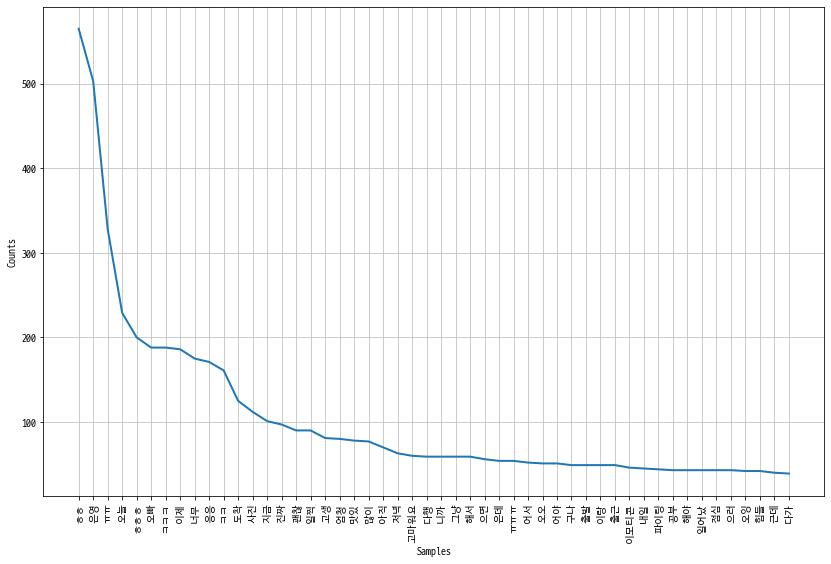

In [35]:
# 그래프
# 한글처리
from matplotlib import font_manager, rc
# fm = font_manager.FontProperties(fname='C:\Windows\Fonts\HMFMPYUN.TTF')
# rc('font', family=fm.get_name())
fm = font_manager.FontProperties(fname='C:\\Users\\tjoeun-jr-902-02\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding-Ver1.3.2-20180524-all.ttc')
rc('font', family='D2Coding')
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 9))
text.plot(50)
plt.show()

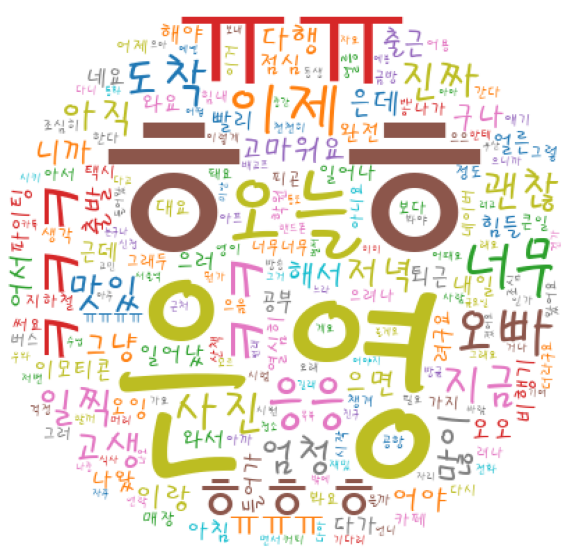

In [83]:
# 워드클라우드
from wordcloud import WordCloud
# wc = WordCloud(font_path='C:\Windows\Fonts\HMFMPYUN.TTF', 

from PIL import Image
import numpy as np
im = Image.open('circle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wc = WordCloud(
    font_path='C:\Windows\Fonts\HMFMPYUN.TTF',
#     font_path='C:\\Users\\tjoeun-jr-902-02\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding-Ver1.3.2-20180524-all.ttc',
              background_color='white',
              width = 700, height = 700, random_state = 43, mask = mask_arr, 
              colormap='tab10',
              ).generate_from_frequencies(dict(text.vocab().most_common(200)))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [81]:
mask_arr[300:, 300:]

array([[[218,   0,  16, 255],
        [218,   0,  16, 255],
        [218,   0,  16, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[218,   0,  16, 255],
        [218,   0,  16, 255],
        [218,   0,  16, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[218,   0,  16, 255],
        [218,   0,  16, 255],
        [218,   0,  16, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255